## Logistic Regression with Polynomial Feature 


In [1]:
try:
    import probml_utils as pml
    from probml_utils import savefig, latexify
except ModuleNotFoundError :
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
    from probml_utils import savefig, latexify
try:
    from sklearn.datasets import make_classification
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 5.0 MB/s 
     |████████████████████████████████| 72 kB 586 kB/s 


In [2]:
latexify(width_scale_factor=2, fig_height=1.85)

In [3]:
def make_data(ntrain, ntest):
    n = ntrain + ntest
    X, y = make_classification(
        n_samples=n, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, class_sep=0.1, random_state=1
    )
    Xtrain = X[:ntrain, :]
    ytrain = y[:ntrain]
    Xtest = X[ntrain:, :]
    ytest = y[ntrain:]
    xmin = jnp.min(X[:, 0])
    xmax = jnp.max(X[:, 0])
    ymin = jnp.min(X[:, 1])
    ymax = jnp.max(X[:, 1])
    xx, yy = jnp.meshgrid(jnp.linspace(xmin, xmax, n), jnp.linspace(ymin, ymax, 200))
    return Xtrain, ytrain, Xtest, ytest, xx, yy

In [4]:
def plot_data(ax, X, y, is_train=True):
    X0 = X[:, 0]
    X1 = X[:, 1]
    colors = ["blue","red"]
    if is_train:
        markers = ["*", "x"]
    else:
        markers = ["s", "o"]
    for i in range(0,2):
      ax.plot(X[y==i, 0], X[y==i, 1], color=colors[i],marker=markers[i], linestyle = 'None', label="Class {}".format(i))
    ax.set_ylim(-2.75, 2.75)
    plt.legend(title='Ground Truth',loc='upper right')
    plt.xlabel('$x_{0}$')
    plt.ylabel('$x_{1}$')
    sns.despine()

In [5]:
def plot_predictions(ax, xx, yy, transformer, model):
    grid = jnp.c_[xx.ravel(), yy.ravel()]
    grid2 = transformer.transform(grid)[:, 1:]
    Z = model.predict(grid2).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.55)

In [6]:
ntrain = 50
ntest = 1000
Xtrain, ytrain, Xtest, ytest, xx, yy = make_data(ntrain, ntest)


In [7]:
def train_plot():
  C_list = jnp.logspace( 0, 5, 7)
  degree=4
  plot_list_C=[1,316,100000]
  err_train_list = []
  err_test_list = []
  weights_list = []
  for i, C in enumerate(C_list):
    transformer = PolynomialFeatures(degree)
    Xtrain_poly_feature = transformer.fit_transform(Xtrain)[:, 1:] 
    model = LogisticRegression(C=int(C))
    model = model.fit(Xtrain_poly_feature, ytrain)
    weight = model.coef_[0]
    weights_list.append(weight)
    ytrain_pred = model.predict(Xtrain_poly_feature)
    nerrors_train = jnp.sum(ytrain_pred != ytrain)
    err_train_list.append(nerrors_train / ntrain)
    Xtest_poly_feature = transformer.fit_transform(Xtest)[:, 1:]  
    ytest_pred = model.predict(Xtest_poly_feature)
    nerrors_test = jnp.sum(ytest_pred != ytest)
    err_test_list.append(nerrors_test / ntest)

    if int(C) in plot_list_C:
      
        fig, ax = plt.subplots()
        name = "Inv Reg (C) = {:d}, Degree = {}".format(int(C), degree)
        plot_predictions(ax, xx, yy, transformer, model)
        plot_data(ax, Xtrain, ytrain, is_train=True)
        ax.set_title(name)
        savefig('log_reg_poly_InvReg_{:d}_deg_{:d}_latexified'.format(int(C),degree))
        plt.draw()
      
        
  plt.figure()
  plt.plot(C_list, err_train_list, "x-", label="train")
  plt.plot(C_list, err_test_list, "o-", label="test")
  plt.legend()
  plt.xscale("log")
  plt.ylim(0,0.5)
  plt.xlabel("Inverse regularization")
  plt.title('Train and Test Error v/s C')
  plt.ylabel("Error Rate")
  
  sns.despine()
  savefig("Train & Test Error vs C,degree_{}_latexified".format(degree))
  plt.show()


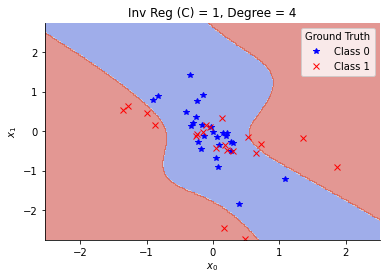

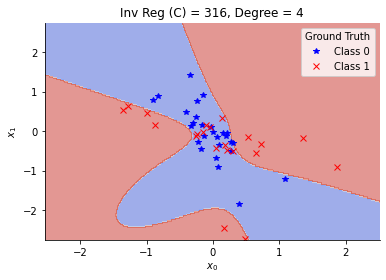

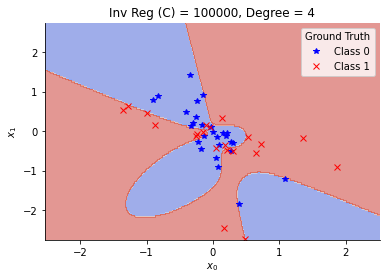

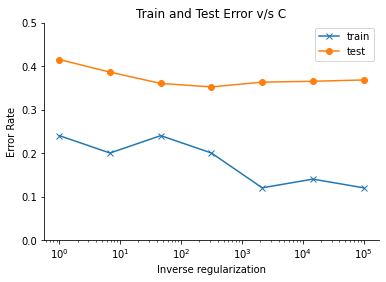

In [8]:
train_plot()